In [4]:
import pandas as pd
import seaborn as sns 

df = pd.read_pickle("clip_mmshap_results.pickle")

# Inspect CLIP MMSHAP data ( no longer used, skip this section)

In [5]:
df

,img_path,caption,foil,linguistic_phenomena,clip_pred_caption,clip_pred_foil,clip_pred_diff,clip_shap_diff,clip_shap_caption,clip_shap_foil,mm_score_caption,bimodal_shap_values_caption,text_tok_caption,mm_score_foil,bimodal_shap_values_foil,text_tok_foil
0,../VALSE_data/images/v7w/v7w_2323364.jpg,There are no cats.,There are cats.,existence,14.561338,14.527007,0.034331,"[[[0.07721242904663086, 0.027895498275756835, ...","[[[-0.4613197326660156, -0.4260571956634521, -...","[[[-0.4142035961151123, -0.45543417930603025, ...",0.347946,"[[[0.0, -0.14345545768737794, -0.3010456562042...",7,0.407181,"[[[0.0, 0.013070058822631837, -0.4842317581176...",6


In [6]:
df.clip_shap_diff[0].shape

(1, 1, 16)

## Look at SHAP values for one image

In [7]:

from PIL import Image
import numpy as np

import math

from mm_shap_files import shap # i am importing this because somehow it's later necessary in the dependencies of image

from mm_shap_files.shap.plots import image


def shap_values_2d(image_shap_values, nr_text_tokens = 0):
    """Given a list of SHAP image values, generate 2d SHAP array of shape 0,row,col,0"""
    image_shap_values = image_shap_values[:,:,nr_text_tokens:]
    nr_patches = image_shap_values.shape[2]
    p = int(math.sqrt(nr_patches) ) # p x p is the total array

    shap_2d_array = np.zeros((1,p,p,1))

    #pixel size of each row and col
    pix_per_row_col = 224 // p # e.g if 4x4 patches, then it's 224 // 4 = 56

    for k in range(nr_patches):
        row = int(k // p)
        col = int(k % p)
        # masked_inputs["pixel_values"][:, :, row * pix_per_row_col:(row+1)*pix_per_row_col, 
        #                     n*patch_size:(n+1)*patch_size] = 0 

        shap_2d_array[0,row,col,0] = image_shap_values[0,0,k]

    return shap_2d_array

def visualize_shap(row):
    """Given row from dataframe, visualize the SHAP values for caption and foil"""
    shap_diff, shap_caption, shap_foil = row['clip_shap_diff'], row['clip_shap_caption'], row['clip_shap_foil']

    # bimodal SHAP visual maps
    shap_bi_caption, shap_bi_foil = row['bimodal_shap_values_caption'], row['bimodal_shap_values_foil']

    image_data = np.array(
        Image.open(
            row['img_path'][1:]).resize( #NOTE: Only doing the slicing to make the path correct)
                (224,224)
                )
        ).astype('float64') 

    pixel_data = image_data.reshape(1, *image_data.shape)
    # list of SHAP arrays
    shap_2d_arrays = [
                    shap_values_2d(shap_diff), 
                      shap_values_2d(shap_caption), 
                      shap_values_2d(shap_foil),
                    #   shap_values_2d(shap_bi_caption, nr_text_tokens=row['text_tok_caption']),
                    #   shap_values_2d(shap_bi_foil, nr_text_tokens=row['text_tok_foil'])
                    ]

    image(shap_values = shap_2d_arrays,
        pixel_values = pixel_data,
        labels = [f"difference \n({row['clip_pred_diff']})",
                  "caption",
                  "foil",
                #   "bimodal caption",
                #   "bimodal foil"
                  ])
    
    print(f"Caption: {row['caption']}\nFoil: {row['foil']}")
    print(f"MM scores with bimodal SHAP, caption: {row['mm_score_caption']}, foil: {row['mm_score_foil']}")


ModuleNotFoundError: No module named 'mm_shap_files'

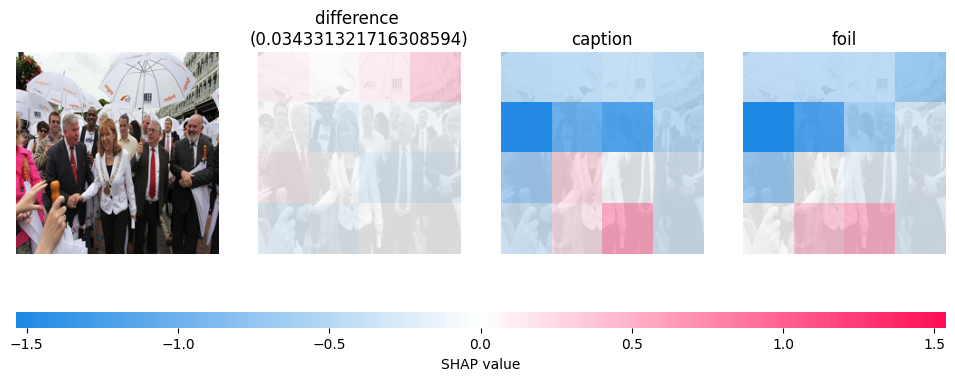

Caption: There are no cats.
Foil: There are cats.
MM scores with bimodal SHAP, caption: 0.34794627884785795, foil: 0.40718081618710555


In [ ]:
row = df.sample(1).iloc[0] # sample one row from the dataframe

visualize_shap(row)

# Inspect CLIP (without MMSHAP) output

In [8]:
import pandas as pd

df_clip_output = pd.read_pickle("clip_all_results.pickle")

In [9]:
df_clip_output

,img_path,caption,foil,linguistic_phenomena,clip_pred_caption,clip_pred_foil,clip_pred_diff
0,../VALSE_data/images/coco2017/000000462576.jpg,Breakfast items including juice are on the table.,Breakfast items including juice are off the ta...,relations,31.603619,31.473452,0.130167
1,../VALSE_data/images/coco2017/000000294162.jpg,The white laptop is turned off but left open.,The white laptop is turned on but left open.,relations,28.649076,28.661810,-0.012733
2,../VALSE_data/images/coco2017/000000144333.jpg,a girl is sitting on a bicycle outside,A girl is sitting behind a bicycle outside,relations,33.161629,32.149235,1.012394
3,../VALSE_data/images/coco2017/000000181666.jpg,The nomadic sheepherd walks behind a large gro...,The nomadic sheepherd walks on a large group o...,relations,32.504292,32.218952,0.285339
4,../VALSE_data/images/coco2017/000000482436.jpg,The woman in the diner and the man looking int...,The woman outside the diner and the man lookin...,relations,29.805805,28.846434,0.959372
...,...,...,...,...,...,...,...
2632,../VALSE_data/images/swig/driving_253.jpg,A man drives a trailer truck.,A trailer truck drives past a man.,actions,27.202665,26.253918,0.948748
2633,../VALSE_data/images/swig/cooking_66.jpg,A man cooks a turkey.,A turkey cooks a man.,actions,28.984596,27.947664,1.036932
2634,../VALSE_data/images/swig/sitting_228.jpg,A woman sits at the piano.,A piano sits beside a woman.,actions,34.728474,33.066360,1.662113
2635,../VALSE_data/images/swig/gnawing_178.jpg,A man gnaws meat.,A meat gnaws man.,actions,26.977476,25.913422,1.064054


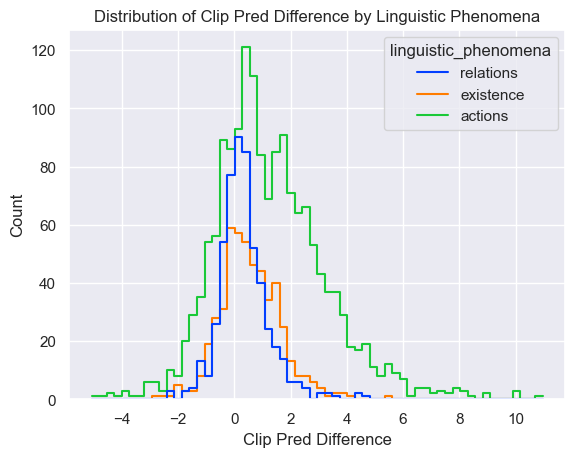

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")


sns.histplot(
    data=df_clip_output,
    x='clip_pred_diff',
    hue='linguistic_phenomena',
    element='step',
    fill=False,
    common_norm=False,
    palette='bright'
)

# Adding the title and labels
plt.title('Distribution of Clip Pred Difference by Linguistic Phenomena')
plt.xlabel('Clip Pred Difference')
plt.ylabel('Count')

# Displaying the plot
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(16.44444444444445, 0.5, 'Clip Prediction Difference ')

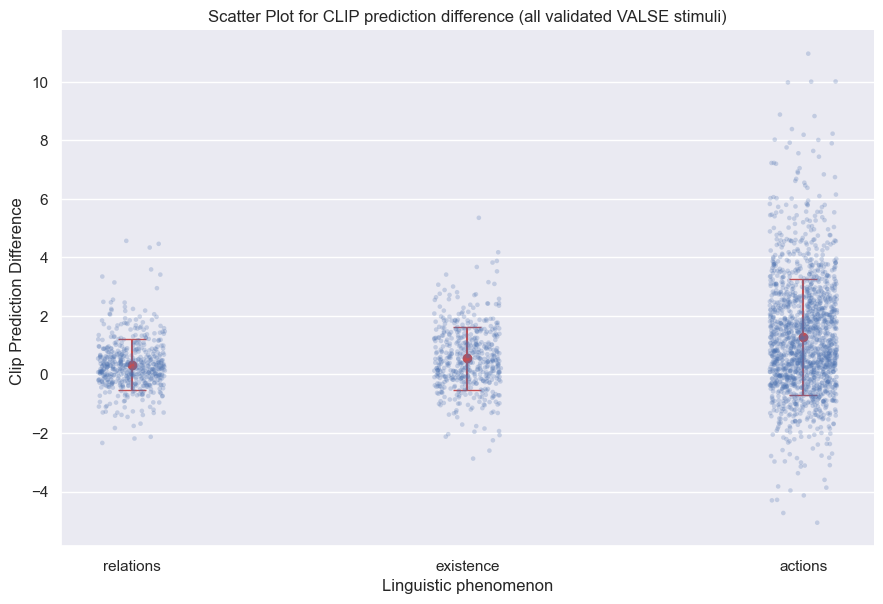

In [15]:
#  scatter plot with 'Approval' on x-axis and 'clip_pred_difference' on y-axis
g = sns.catplot(x='linguistic_phenomena', y='clip_pred_diff', data=df_clip_output,
                kind='strip', dodge=True, edgecolor='none', alpha=0.25, s=11, height=6, aspect=1.5)

#  mean and standard deviation
means = df_clip_output.groupby('linguistic_phenomena')['clip_pred_diff'].mean()
stds = df_clip_output.groupby('linguistic_phenomena')['clip_pred_diff'].std()
ax = g.ax
for i, (approval, mean) in enumerate(means.items()):
    ax.errorbar(approval, mean, yerr=stds[i], fmt='o', color='r', capsize=10)

ax.set_title(f'Scatter Plot for CLIP prediction difference (all validated VALSE stimuli)')
ax.set_xlabel('Linguistic phenomenon')
ax.set_ylabel('Clip Prediction Difference ')